In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from tqdm import tqdm

from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

device = 'cuda' if torch.cuda.is_available() else 'cpu'

np.set_printoptions(threshold=np.inf)

In [2]:
def b(log_n):
    return np.sqrt(2 * log_n) - (np.log(log_n) + np.log(4 * np.pi))/(2 * np.sqrt(2 * log_n))

def a(log_n):
    return np.sqrt(2 * log_n)

## Check Correctness of Gumbel Formula

In [3]:
d_m = torch.distributions.multivariate_normal.MultivariateNormal(torch.zeros(32*32, device=device), torch.eye(32*32, device=device))

r = torch.empty(0)
for i in tqdm(range(1000)):
    r = torch.cat([r, torch.norm(d_m.sample((1*100000,)), dim=1).reshape(1, 100000).max(dim=1)[0].cpu()])
    
r2 = torch.empty(0)
for i in tqdm(range(100)):
    r2 = torch.cat([r2, torch.norm(d_m.sample((100*100,)), dim=1).reshape(100, 100).max(dim=1)[0].cpu()])

100%|██████████| 100/100 [00:00<00:00, 151.66it/s]


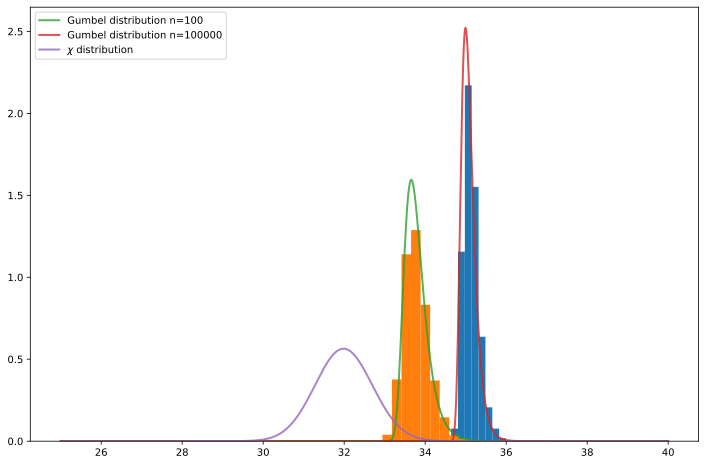

In [4]:
dim = 32 * 32

x = np.linspace(25, 40, 100000)

mean = stats.chi(dim).rvs(10000).mean()
std = stats.chi(dim).rvs(10000).std()

plt.figure(figsize=(12, 8))

plt.hist(r, density=True)
plt.hist(r2, density=True)

plt.plot(
    x,
    stats.gumbel_r.pdf(x, 32+b(np.log(100))*0.7, 1/a(np.log(100))*0.7),
    label=r'Gumbel distribution n=100',
    linewidth=2, alpha=0.8
)
plt.plot(
    x,
    stats.gumbel_r.pdf(x, 32+b(np.log(100000))*0.7, 1/a(np.log(100000))*0.7),
    label=r'Gumbel distribution n=100000',
    linewidth=2, alpha=0.8
)

plt.plot(x, stats.chi.pdf(x, dim), label=r'$\chi$ distribution', linewidth=2,
         alpha=0.8)
# plt.plot(x, stats.chi.pdf(x, dim, scale=3), label=r'$\chi$ distribution', linewidth=2,
#          alpha=0.8)

plt.legend(loc=2)
plt.show()

## Compare Gumbel Distribution with $\chi$

/home/tillb/miniconda3/envs/pytorch-latest/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:3072: RuntimeWarning: overflow encountered in exp
  return -x - np.exp(-x)
/home/tillb/miniconda3/envs/pytorch-latest/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:3072: RuntimeWarning: overflow encountered in exp
  return -x - np.exp(-x)
/home/tillb/miniconda3/envs/pytorch-latest/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:3072: RuntimeWarning: overflow encountered in exp
  return -x - np.exp(-x)
/home/tillb/miniconda3/envs/pytorch-latest/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:3072: RuntimeWarning: overflow encountered in exp
  return -x - np.exp(-x)
/home/tillb/miniconda3/envs/pytorch-latest/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:3072: RuntimeWarning: overflow encountered in exp
  return -x - np.exp(-x)
/home/tillb/miniconda3/envs/pytorch-latest/lib/python3.7/site-packages/scipy/stats/_continuous_distn

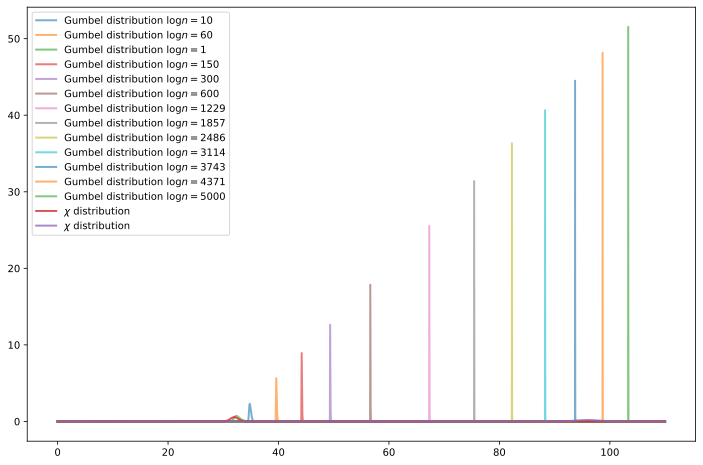

In [5]:
dim = 32 * 32

x = np.linspace(0, 110, 100000)

mean = stats.chi(dim).rvs(10000).mean()
std = stats.chi(dim).rvs(10000).std()

plt.figure(figsize=(12, 8))

for i in [10, 60] + list(np.linspace(1, 300, 3)) + list(np.linspace(600, 5000, 8)):
    i = np.rint(i).astype(int)
    plt.plot(
        x,
        stats.gumbel_r.pdf(x, mean+b(i)*std, 1/a(i)*std),
        label=f'Gumbel distribution $\log n = {i:d}$',
        linewidth=2, alpha=0.6
    )

plt.plot(x, stats.chi.pdf(x, dim), label=r'$\chi$ distribution', linewidth=2,
         alpha=0.8)
plt.plot(x, stats.chi.pdf(x, dim, scale=3), label=r'$\chi$ distribution', linewidth=2,
         alpha=0.8)

plt.legend(loc=2)
# plt.savefig('gumbel_large.png', dpi=800)
plt.show()

/home/tillb/miniconda3/envs/pytorch-latest/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:3072: RuntimeWarning: overflow encountered in exp
  return -x - np.exp(-x)


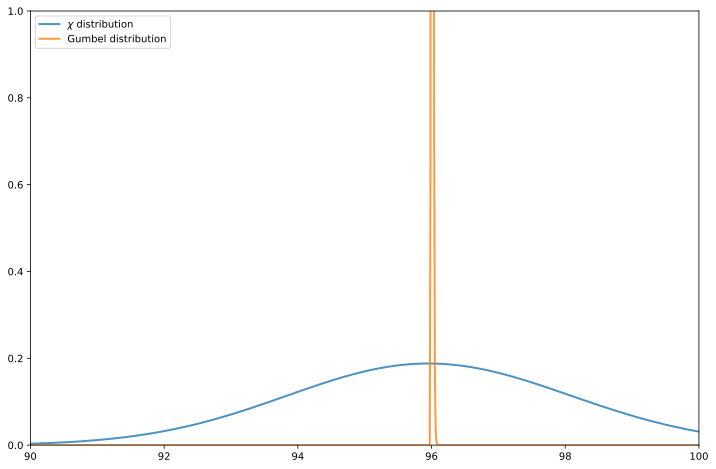

In [6]:
dim = 32 * 32

x = np.linspace(0, 110, 10000)

mean = stats.chi(dim).rvs(10000).mean()
std = stats.chi(dim).rvs(10000).std()

plt.figure(figsize=(12, 8))

plt.plot(x, stats.chi.pdf(x, dim, scale=3), label=r'$\chi$ distribution', linewidth=2,
         alpha=0.8)

plt.plot(
    x,
    stats.gumbel_r.pdf(x, 32 + b(4185)*0.7, 1/a(4185)*0.7),
    label=r'Gumbel distribution',
    linewidth=2, alpha=0.8
)

plt.legend(loc=2)
plt.xlim((90, 100))
plt.ylim((0, 1))
# plt.savefig('gumbel_zoomed.png', dpi=800)
plt.show()

/home/tillb/miniconda3/envs/pytorch-latest/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:3072: RuntimeWarning: overflow encountered in exp
  return -x - np.exp(-x)


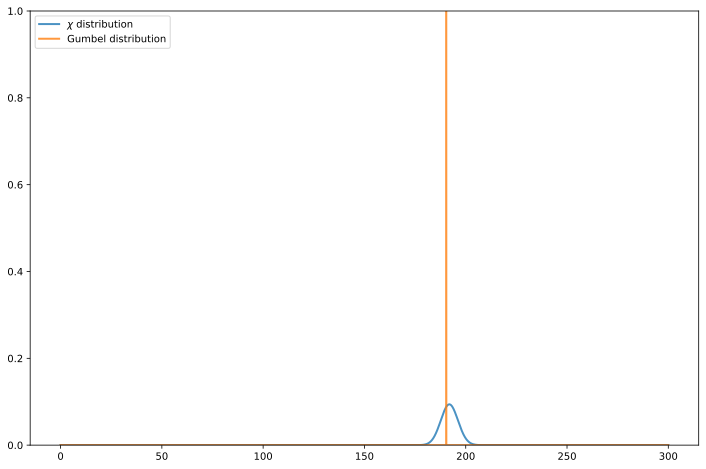

In [7]:
dim = 32 * 32
s = 6

x = np.linspace(0, 300, 10000)

mean = stats.chi(dim).rvs(10000).mean()
std = stats.chi(dim).rvs(10000).std()

plt.figure(figsize=(12, 8))

plt.plot(x, stats.chi.pdf(x, dim, scale=s), label=r'$\chi$ distribution', linewidth=2,
         alpha=0.8)

plt.plot(
    x,
    stats.gumbel_r.pdf(x, 32 + b(((s-1)*32)**2 + np.exp(-(s - 1)))*0.7, 1/a(((s-1)*32)**2 + np.exp(-(s - 1)))*0.7),
    label=r'Gumbel distribution',
    linewidth=2, alpha=0.8
)

plt.legend(loc=2)
# plt.xlim((90, 100))
plt.ylim((0, 1))
# plt.savefig('gumbel_zoomed.png', dpi=800)
plt.show()

## Compare Distributions Resulting from Mahlanobis

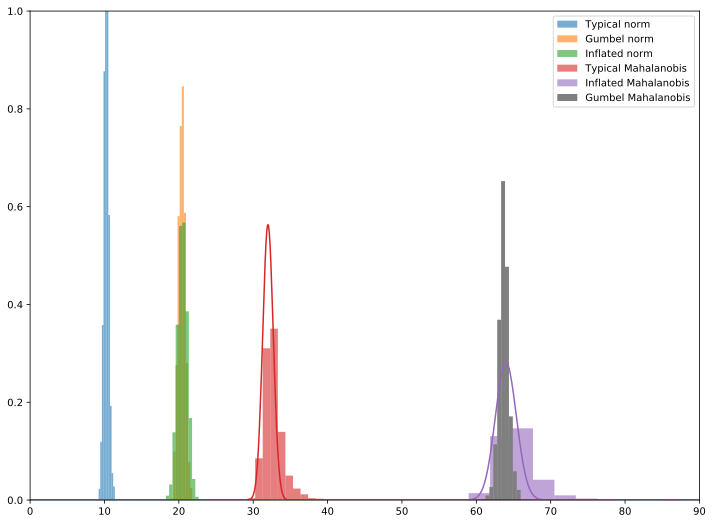

In [9]:
s = 2
# cov = np.eye(32*32)
# cov = np.load('cov.npy')
temp = 0.01 * np.random.randn(32*32, 32*32)
temp[:, 31] = temp[:, 0] + temp[:, 1]

cov = temp @ temp.T

icov = np.linalg.inv(cov)
mean = np.zeros(32*32)

x = np.random.multivariate_normal(np.zeros(32*32), cov, 1000)
y = np.random.multivariate_normal(np.zeros(32*32), s**2*cov, 1000)
gumbel = stats.gumbel_r(32+b((s*32 - 32)**2)*0.7, 1/a((s*32 - 32))*0.7)

w, v = np.linalg.eig(cov)

z = x.copy()
z /= np.linalg.norm(z, axis=1)[:, None]

r = gumbel.rvs(1000)
# r = np.random.uniform(61, 64.5, (1000,))
r_ = r[:, None, None] * (np.sqrt(np.diag(w)) @ v.T)[None, :, :]

# combine direction and radius
z = z[:, None, :] @ r_
z = z.reshape(-1, 32*32)

x_ = np.linspace(0, 110, 1000)

plt.figure(figsize=(12, 9))

plt.hist(np.linalg.norm(x, axis=1), density=True, label='Typical norm', color='C0', alpha=0.6)
plt.hist(
    np.linalg.norm(z, axis=1), density=True, label='Gumbel norm', alpha=0.6, color='C1'
)

plt.hist(np.linalg.norm(y, axis=1), density=True, label='Inflated norm', alpha=0.6, color='C2')

plt.hist(
    np.sqrt(x[:, None, :] @ icov @ x[:, :, None]).reshape(-1),
    density=True, label='Typical Mahalanobis', color='C3', alpha=0.6
)
plt.plot(x_, stats.chi.pdf(x_, 1024), color='C3')

plt.hist(
    np.sqrt(y[:, None, :] @ icov @ y[:, :, None]).reshape(-1),
    density=True, label='Inflated Mahalanobis', color='C4', alpha=0.6
)
plt.plot(x_, stats.chi.pdf(x_, 1024, scale=s), color='C4')


# plt.hist(np.sqrt(1/(s**2) * y[:, None, :] @ icov @ y[:, :, None]).reshape(-1), density=True, label='Inflated Mahalanobis corrected', alpha=0.6)
plt.hist(np.sqrt(z[:, None, :] @ icov @ z[:, :, None]).reshape(-1), density=True, label='Gumbel Mahalanobis', color='C7')

plt.ylim((0, 1))
plt.xlim((0, 90))
plt.legend()
plt.show()

In [ ]:
s = 2
# cov = np.eye(32*32)
# cov = np.load('cov.npy')
temp = 0.01 * np.random.randn(32*32, 32)
# temp[:, 31] = temp[:, 0] + temp[:, 1]

cov = temp @ temp.T
print(np.linalg.matrix_rank(cov))

icov = np.linalg.inv(cov)
mean = np.zeros(32*32)

x = np.random.multivariate_normal(np.zeros(5), cov[:5, :5], 20000)
x[:, 2] = x[:, 0]*x[:, 1]
x[:, 3] = x[:, 0]+x[:, 1]
x[:, 4] = 0.7*x[:, 0] + np.random.uniform(-1, 1, (20000,))


for i in range(0, 5):
    plt.hist(
        (x[:, i] - x[:, i].mean())/x[:, i].std(), bins=100,
        density=True, color='C4', alpha=0.6
    )
    plt.show()